# Human Activity Recongition Models - UCI Repository

## Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.utils import shuffle
from sklearn import linear_model


## Loading datasets

In [2]:
trainX = pd.read_table('./X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_table('./y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("./X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('./y_test.txt',delim_whitespace=True,header=None)

dickey = {"1":"WALKING", "2":"WALKING_UPSTAIRS","3":"WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING"}

## Normalizing dataset by subtracting with mean and divide by std

In [3]:
mu = trainX.mean(axis=0)
mu1 = testX.mean(axis=0)
stdv = trainX.std(axis = 0)
stdv1 = testX.std(axis = 0)

X_train = (trainX - mu)/stdv   #normalized train set
X_test = (testX - mu1)/stdv1  #normalized test set
y_train = trainy              #train set of labels
y_test = testy               #test set of label 
y = np.array(y_train).ravel() #2d to 1 conversion

## Decision Tree

Training Accuracy of Decision Tree: 0.9351196953210011
Testing Accuracy of Decision Tree: 0.828978622327791


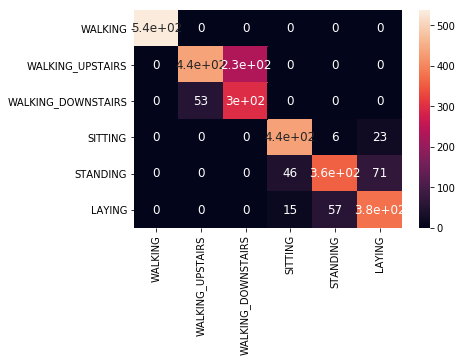

In [4]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
rank_classifier.fit(X_train,y)
Predictions_test = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)
TrainAccuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)
TestAccuracy = accuracy_score(y_true = y_test, y_pred = Predictions_test)

print("Training Accuracy of Decision Tree: {}".format(TrainAccuracy))
print("Testing Accuracy of Decision Tree: {}".format(TestAccuracy))

yy = list(map(str, Predictions_test))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

## K Neearest Neighbors

In [ ]:
from sklearn import neighbors
Accuracy_KNN = np.array([])
rangeli = list(range(3,10))
for i in rangeli:                            #iterating through different k values
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y)
    predicted_knn = knn.predict(X_test)
    Accuracy = accuracy_score(y_true = y_test, y_pred = predicted_knn)
    Accuracy_KNN = np.append(Accuracy_KNN, Accuracy)
    print(Accuracy)
    print(Accuracy_KNN)

plt.plot(rangeli, Accuracy_KNN)
plt.show()
print("Optimal K value is {}".format(rangeli[np.argmax(Accuracy_KNN)]))
print("Accuracy of Optimum K value is {}".format(np.max(Accuracy_KNN)))

## Gaussian Naive Bayes

Training Accuracy of Gaussian Naive Bayes:  0.7461915125136017
Testing Accuracy of Gaussian Naive Bayes: 0.5721072276891754


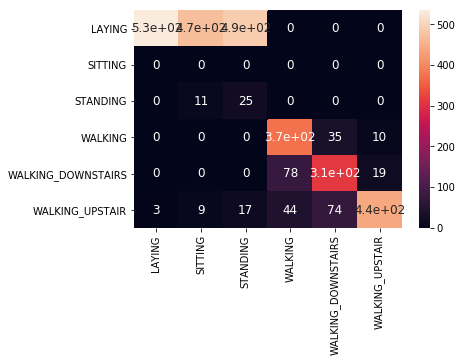

In [6]:
from sklearn.naive_bayes import GaussianNB

mnb = GaussianNB()               #loading model
mnb.fit(X_train, y)              #fitting the model
predicted_mnb = mnb.predict(X_test)
predicted_train = mnb.predict(X_train)
#Accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
Accuracy_test = accuracy_score(y_true = y_test, y_pred = predicted_mnb)
Accuracy_train = accuracy_score(y_true = y_train, y_pred = predicted_train)
print("Training Accuracy of Gaussian Naive Bayes:  {}".format(Accuracy_train))
print("Testing Accuracy of Gaussian Naive Bayes: {}".format(Accuracy_test))

yy = list(map(str, predicted_mnb))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
df_cm.index = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"), xticklabels=("LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"))# font size
plt.show()

In [7]:
df_cm  #confusion matrix dataframe

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIR
LAYING,534,471,490,0,0,0
SITTING,0,0,0,0,0,0
STANDING,0,11,25,0,0,0
WALKING,0,0,0,374,35,10
WALKING_DOWNSTAIRS,0,0,0,78,311,19
WALKING_UPSTAIR,3,9,17,44,74,442


## Logistic Regression

In [8]:
cli = [1,0.5,0.1,0.01,0.003,0.0003]
trainacc = np.array([])
testacc = np.array([])
for j in cli:         #iterating through different penalty values
    LRmod = linear_model.LogisticRegression(penalty='l1', C=j)
    LRmod.fit(X_train,y)
    pred = LRmod.predict(X_test)
    pred1 = LRmod.predict(X_train)
    testac = accuracy_score(y_true = y_test, y_pred = pred)
    trainac = accuracy_score(y_true = y_train, y_pred = pred1)
    trainacc = np.append(trainacc,trainac)
    testacc = np.append(testacc,testac)
    print("Training Accuracy for penalty {}: {}".format(j,trainac))
    print("Testing Accuracy for penalty {}: {}".format(j,testac))

print("\n========================================================\n")
val = np.subtract(trainacc,testacc)    #finding the least difference between training and testing accuracy
print("Optimum Penalty value: {}".format(cli[np.argmin(val)]))
print("Maximum Testing Accuracy: {}".format(testacc[np.argmin(val)]))
print("Maximum Training Accuracy: {}".format(trainacc[np.argmin(val)]))

Training Accuracy for penalty 1: 0.9952393906420022
Testing Accuracy for penalty 1: 0.9647098744485918
Training Accuracy for penalty 0.5: 0.9933351468988031
Testing Accuracy for penalty 0.5: 0.9640312181879878
Training Accuracy for penalty 0.1: 0.9862622415669206
Testing Accuracy for penalty 0.1: 0.9589412962334578
Training Accuracy for penalty 0.01: 0.9462731229597389
Testing Accuracy for penalty 0.01: 0.9317950458092976
Training Accuracy for penalty 0.003: 0.9073721436343852
Testing Accuracy for penalty 0.003: 0.9165252799457075
Training Accuracy for penalty 0.0003: 0.16675734494015235
Testing Accuracy for penalty 0.0003: 0.168306752629793


Optimum Penalty value: 0.003
Maximum Testing Accuracy: 0.9165252799457075
Maximum Training Accuracy: 0.9073721436343852


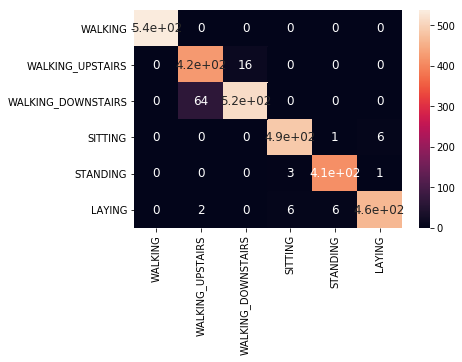

In [10]:
LRmod = linear_model.LogisticRegression(penalty='l1')
LRmod.fit(X_train,y)
pred = LRmod.predict(X_test)
yy = list(map(str, pred))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
df_cm.index = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]

#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

In [11]:
df_cm #confusion matrix plot

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIR
LAYING,537,0,0,0,0,0
SITTING,0,425,16,0,0,0
STANDING,0,64,516,0,0,0
WALKING,0,0,0,487,1,6
WALKING_DOWNSTAIRS,0,0,0,3,413,1
WALKING_UPSTAIR,0,2,0,6,6,464


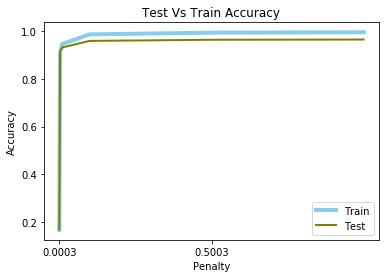

In [12]:
# multiple line plot
plt.plot( cli,trainacc , marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='Train')
plt.plot( cli,testacc ,marker='', color='olive', linewidth=2, label='Test')
plt.xticks(np.arange(min(cli), max(cli), 0.5))
plt.title('Test Vs Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Penalty')
plt.legend()
plt.show()

## Support Vector Machine

In [131]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
predsvm = clf.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predsvm)
predsvm = clf.predict(X_train)
accuracy_score(y_true = y_train, y_pred = predsvm)

## Neural Network 


In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1,solver='adam')
sgd = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1, solver ='sgd',max_iter=500 )
clf.fit(X_train,y)
sgd.fit(X_train,y)

MLPClassifier(activation='relu', alpha=5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Training Accuracy in Neural Network: 0.9737486398258978
Testing Accuracy in Neural Network: 0.9541907024092298


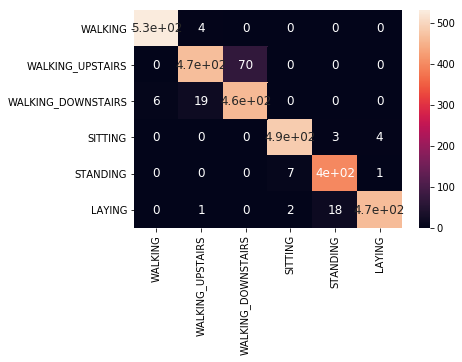

In [13]:
pred = clf.predict(X_test)
predt = clf.predict(X_train)
TeAccuracy = accuracy_score(y_true = y_test, y_pred = pred)
TrAccuracy = accuracy_score(y_true = y_train, y_pred = predt)

print("Training Accuracy in Neural Network: {}".format(TrAccuracy))
print("Testing Accuracy in Neural Network: {}".format(TeAccuracy))

yy = list(map(str, pred))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
df_cm.index = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

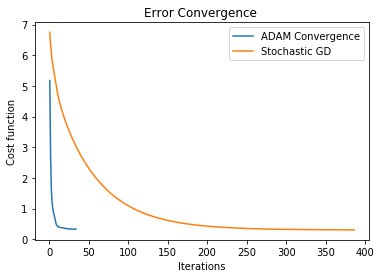

In [15]:
X1 = np.linspace(1, clf.n_iter_  , clf.n_iter_ )
X2 = np.linspace(1, sgd.n_iter_  , sgd.n_iter_ )

plt.plot(X1 , clf.loss_curve_ , label = 'ADAM Convergence' )
plt.plot(X2,sgd.loss_curve_,label = "Stochastic GD")
plt.title('Error Convergence ')
plt.ylabel('Cost function')
plt.xlabel('Iterations')
plt.legend()
plt.show()

In [16]:
df_cm  #confusion matrix table

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIR
LAYING,531,4,0,0,0,0
SITTING,0,467,70,0,0,0
STANDING,6,19,462,0,0,0
WALKING,0,0,0,487,3,4
WALKING_DOWNSTAIRS,0,0,0,7,399,1
WALKING_UPSTAIR,0,1,0,2,18,466


## PCA - Principle Component Analysis

In [2]:
trainX = pd.read_table('./X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_table('./y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("./X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('./y_test.txt',delim_whitespace=True,header=None)
one = [trainX,testX]
two = [trainy,testy]
X_df = pd.concat(one)
y_df = pd.concat(two)

### Helper functions for PCA

In [3]:
def fetaure_norm(X):
    mu = X.mean(axis=0)
    stdv = X.std(axis = 0)

    X_norm = (X - mu)/stdv
    return X_norm

def pca(X):
    m,n = X.shape
    
    sigma = (1/m) * X.T * X
    a, b = np.linalg.eig(sigma)
    
    sort = a.argsort()[::-1]
    eigVal = a[sort]
    eigVec = b[:,sort]
    
    return eigVal,eigVec

def reduced_data(X, U, k):
    U_reduce = U[:,:k]
    Z = U_reduce.T * X.T
    return Z

def recover_data(Z,U,K):
    X_rec = Z.T * U[:,:k].T
    return X_rec

def variance_cal(S,k,m):
    total1 = 0
    total2 = 0
    for i in range(1,k):
        total1 = total1 + S[i]
    
    for j in range(1,m):
        total2 = total2 + S[j]
        
    variance = total1/total2
    return variance

In [14]:
X = np.asmatrix(X_df)
y = np.asmatrix(y_df)

X_norm = fetaure_norm(X)
m,n = X_norm.shape
a,b = pca(X_norm)
tes = np.array([])
li = list(range(10,250))
for k in li:
    Z = reduced_data(X_norm,b,k)
    X_recov = recover_data(Z,b,k)
    test1 = variance_cal(a,k,n)
    tes = np.append(tes,test1)
    #print("Variance covered with {} features: {}%".format(k,test1*100))

C:\Users\gokul\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


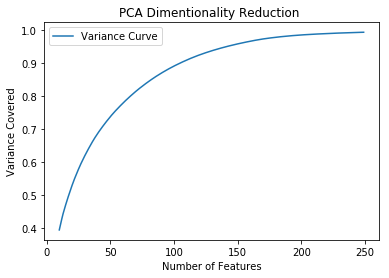

In [19]:
plt.plot(li,tes, label = 'Variance Curve')
plt.title('PCA Dimentionality Reduction ')
plt.ylabel('Variance Covered')
plt.xlabel('Number of Features')
plt.legend()
plt.show()